# Plotting Pandapower Networks Without Geographical Information

If a network does not have geographic coordinates, you can create generic coordinates for plotting with the create_generic_coordinates function.

###### You need to install the igraph package for this functionality: https://igraph.org/python/

In [9]:
from pandapower.networks import mv_oberrhein
from pandapower.plotting import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
try:
    import seaborn
    colors = seaborn.color_palette()
except ImportError:
    colors = ["b", "g", "r", "c", "y"]

We delete the geocoordinates from the network and create generic ones:

In [10]:
net = mv_oberrhein()
# net.bus.geo.drop(net.bus.geo.index, inplace=True)
net.bus.geo = None
# net.line.geo.drop(net.line.geo.index, inplace=True)
net.line.geo = None
create_generic_coordinates(net, respect_switches=False) #create artificial coordinates with the igraph package

This pandapower network includes the following parameter tables:
   - bus (179 elements)
   - load (147 elements)
   - sgen (153 elements)
   - switch (322 elements)
   - ext_grid (2 elements)
   - line (181 elements)
   - trafo (2 elements)
 and the following results tables:
   - res_bus (179 elements)
   - res_line (181 elements)
   - res_trafo (2 elements)
   - res_ext_grid (2 elements)
   - res_load (147 elements)
   - res_sgen (153 elements)
   - res_switch (322 elements)

As you can see the table bus_geodata has been created and we can now plot as before. Since the function only creates bus geodata, we can only use the direct line plotting. Furthermore it creates a distance between high- and low voltage bus of a transformer, which is why we also need a transformer collection:

<Axes: >

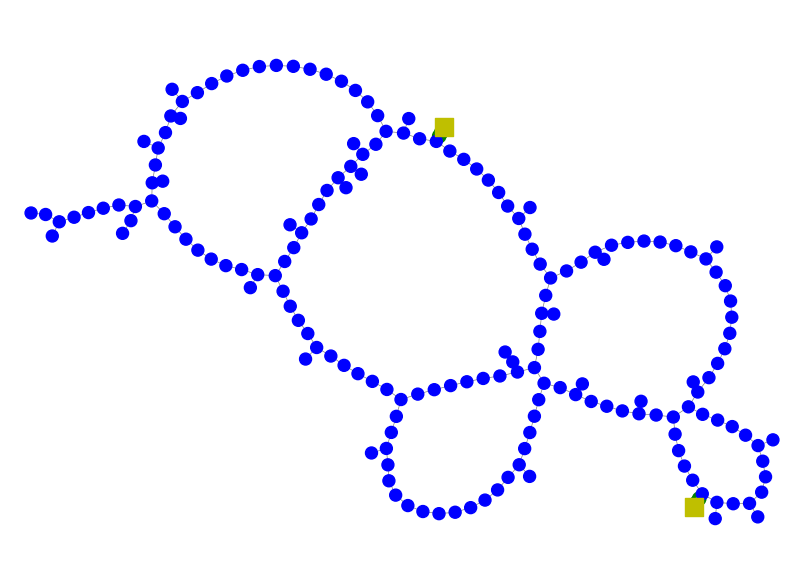

In [11]:
sizes = get_collection_sizes(net)
bc = create_bus_collection(net, net.bus.index, size=sizes['bus'], color='b', zorder=10)
tlc, tpc = create_trafo_collection(net, net.trafo.index, color="g", size=sizes['trafo'])
lcd = create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)
sc = create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=sizes['ext_grid'], color="y", zorder=11)
draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))

The create_generic_coordinates function treats transformers as edges, which means the HV and LV side of the transformer are shown by seperate buses with a trafo symbol as connection (consisting of a line collection for the connections and a patch collection for the circles).

If you do not want to plot the transformers you can use the fuse_geodata function. It fuses the geocoordinates of all buses that are geographically in one place (HV/LV bus of a transformer or buses and buses that are connected by a bus-bus switch):

In [12]:
net.bus.geo.loc

The number of given colors (1) is smaller than the number of nodes (179) to draw! The colors will be repeated to fit.


<Axes: >

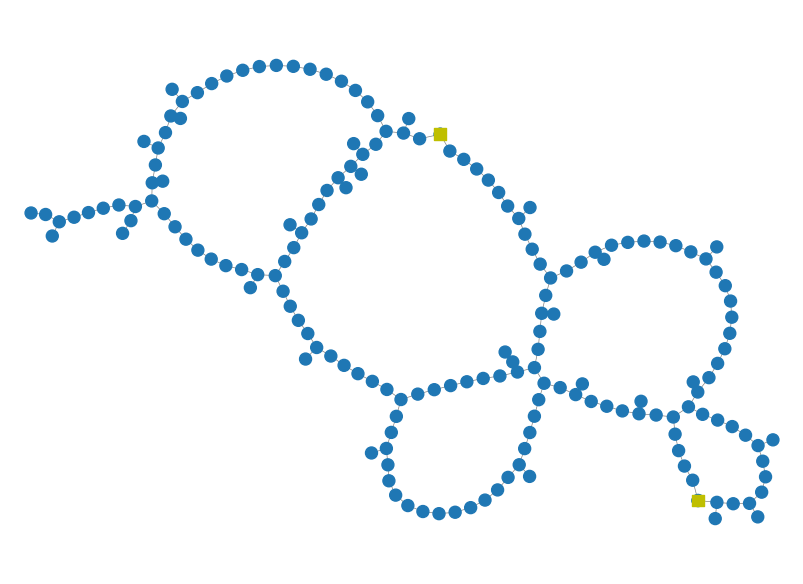

In [13]:
fuse_geodata(net)
sizes = get_collection_sizes(net)
bc = create_bus_collection(net, net.bus.index, size=sizes['bus'], color=colors[0], zorder=10)
tlc, tpc = create_trafo_collection(net, net.trafo.index, color="g", size=sizes['trafo'])
lcd = create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)
sc = create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=sizes['bus'], color="y", zorder=11)
draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))

## Plot Structural Plans

To plot a structural plan of the network instead of a geographical one, call the generic coordinates function with respect_switches=True.

In [14]:
net = mv_oberrhein()
net.bus.geo = None
net.line.geo = None
create_generic_coordinates(net, respect_switches=True) #create artificial coordinates with the igraph package

This pandapower network includes the following parameter tables:
   - bus (179 elements)
   - load (147 elements)
   - sgen (153 elements)
   - switch (322 elements)
   - ext_grid (2 elements)
   - line (181 elements)
   - trafo (2 elements)
 and the following results tables:
   - res_bus (179 elements)
   - res_line (181 elements)
   - res_trafo (2 elements)
   - res_ext_grid (2 elements)
   - res_load (147 elements)
   - res_sgen (153 elements)
   - res_switch (322 elements)

In that way, the algorithm seperates buses which are seperated by an open switch:

The number of given colors (1) is smaller than the number of nodes (179) to draw! The colors will be repeated to fit.


<Axes: >

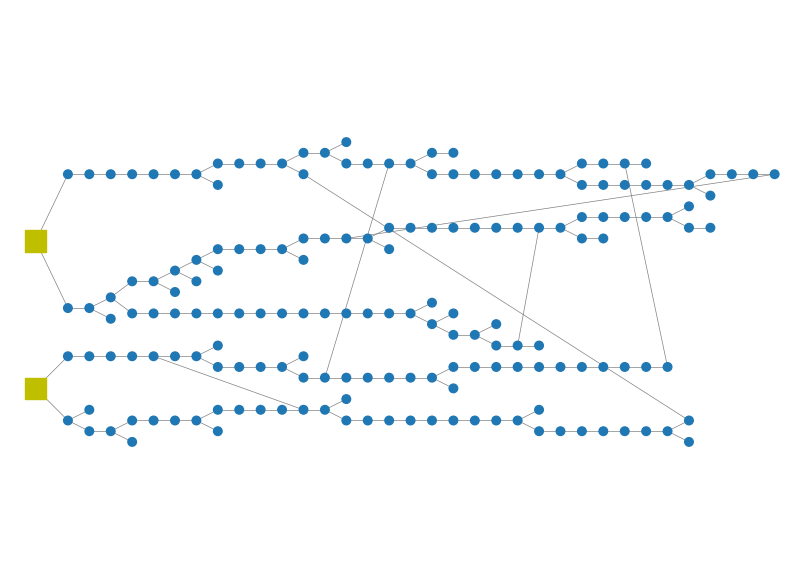

In [15]:
fuse_geodata(net)
bc = create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tlc, tpc = create_trafo_collection(net, net.trafo.index, color="g")
lcd = create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)
sc = create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.5, color="y", zorder=11)
draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))

For a clearer arrangement, it might be useful to only plot the lines without an open switch:

<Axes: >

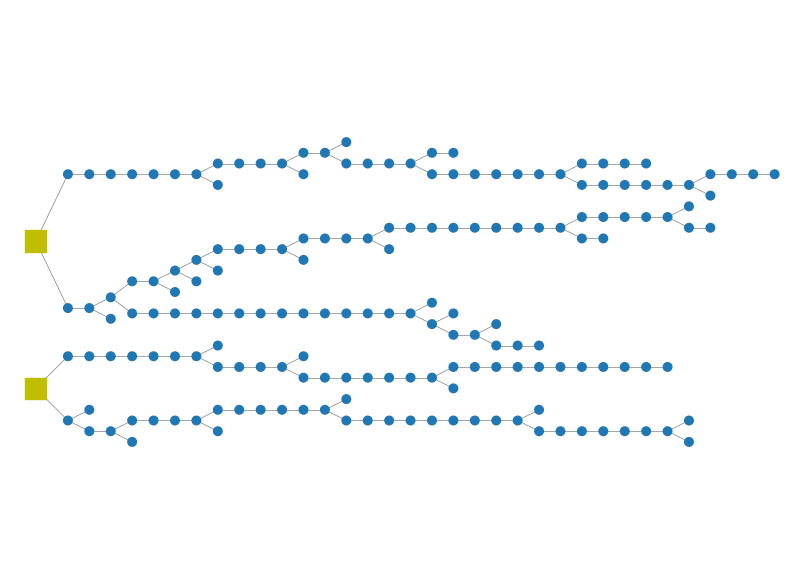

In [16]:
closed_lines = set(net.line.index) - set(net.switch[(net.switch.et=="l") & (net.switch.closed==False)].element.values)
lcd = create_line_collection(net, closed_lines, color="grey", linewidths=0.5, use_bus_geodata=True)
draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))